In [34]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D
import seaborn as sns # manipulation des statistiques

In [35]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [36]:
df = pd.read_csv("Churn_Modelling.csv") #importer la base de donnée
df.shape

(10000, 14)

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

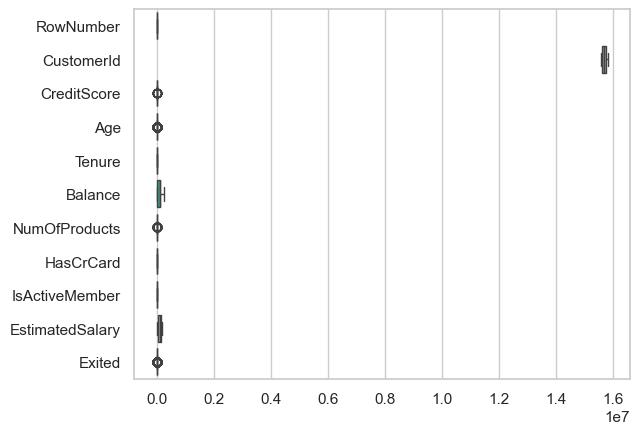

In [41]:
sns.set_theme(style='whitegrid')
sns.boxplot(data=df, orient='h')
plt.show()

Text(0.5, 0, 'Profit')

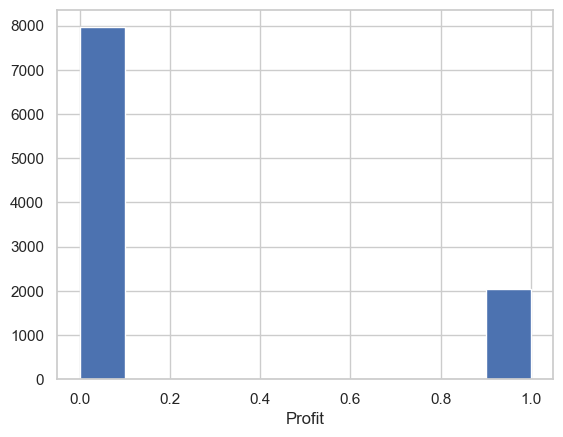

In [42]:
plt.hist(df['Exited'])
plt.xlabel("Profit")

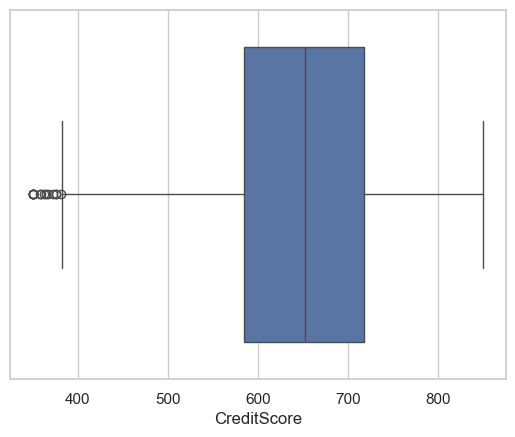

In [43]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

In [44]:
q1 = df['CreditScore'].quantile(0.25)
q2 = df['CreditScore'].quantile(0.75)
IQR = q2-q1
b_inf = q1-1.5*IQR
b_sup = q2+1.5*IQR
df = df[df['CreditScore']>b_inf]
df = df[df['CreditScore']<b_sup]

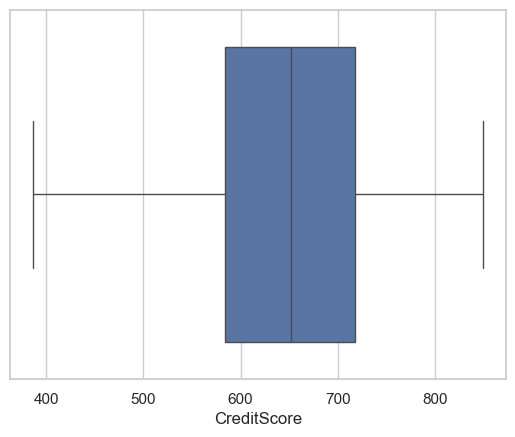

In [45]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

<Axes: >

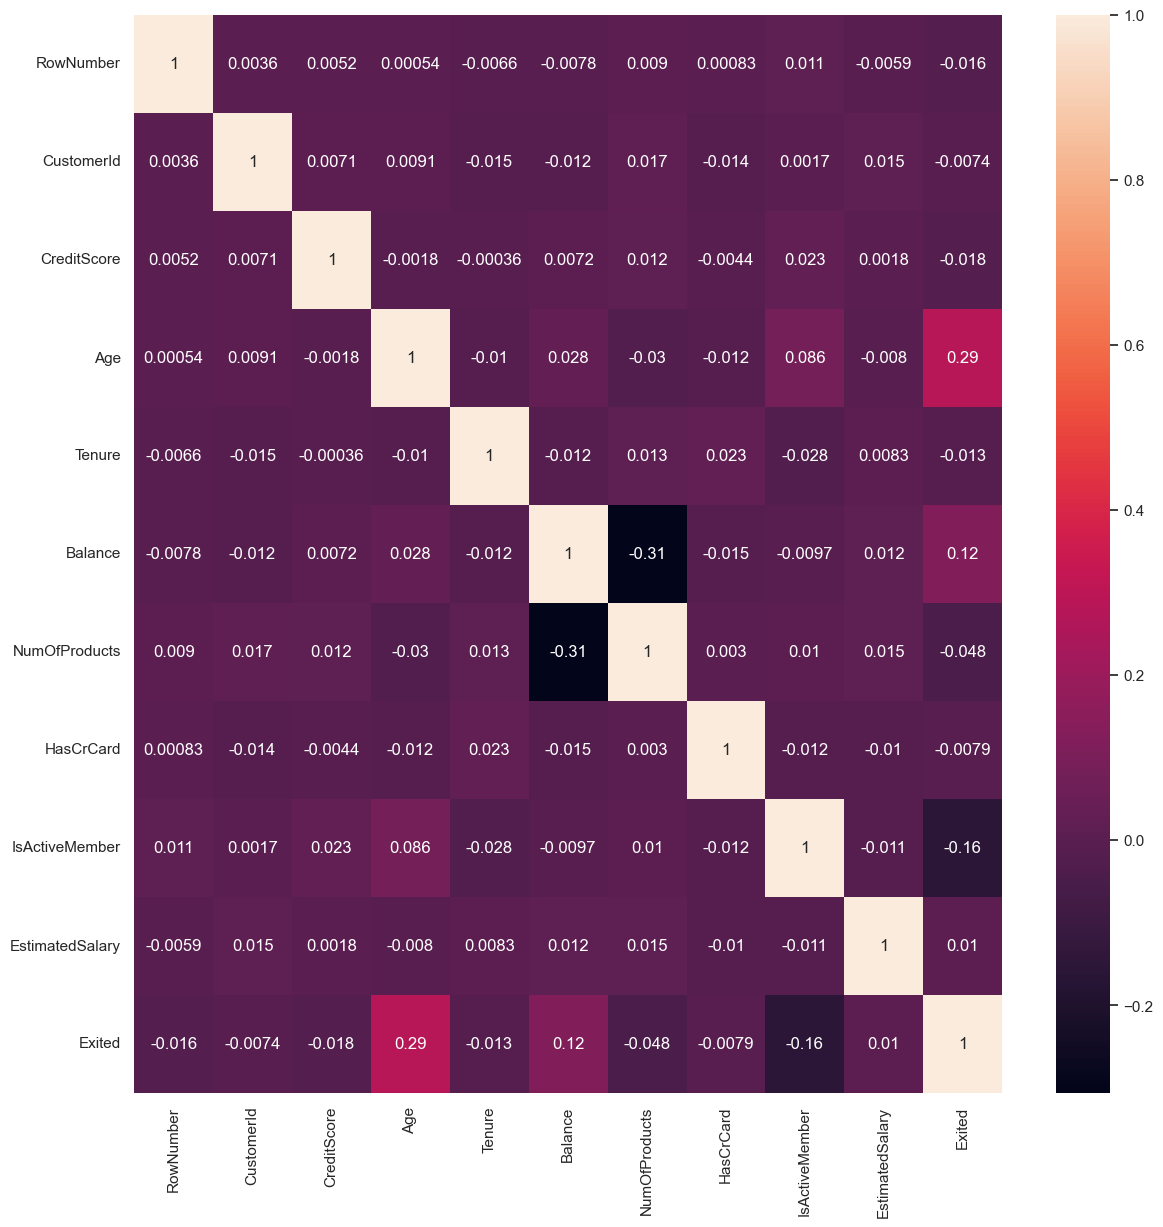

In [46]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlations = numerical_columns.corr(method = 'pearson')
plt.figure(figsize = (14, 14))
sns.heatmap(correlations, annot = True)

In [65]:
x = df.iloc[:, :13].values
y = df.iloc[:, 13].values

In [64]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x[:,2]=label.fit_transform(x[:,2])
x[:,4]=label.fit_transform(x[:,4])
x[:,5]=label.fit_transform(x[:,5])

x[0:2,:]

array([[1, 15634602, 1114, 619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [2, 15647311, 1176, 608, 2, 0, 41, 1, 83807.86, 1, 0, 1,
        112542.58]], dtype=object)

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('state',OneHotEncoder(),[2, 4, 5])],remainder='passthrough')
x=ct.fit_transform(x)

In [72]:
x[0:5,:]

<5x2946 sparse matrix of type '<class 'numpy.float64'>'
	with 59 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(7987, 2946)